Navaneeth Krishnan
10-11-22

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier

In [8]:
db = pd.read_csv('diabetes.csv')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
print(db.shape)
db.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
db.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
y=db['Outcome']
db=db.drop(['Outcome'],axis=1)
x=db
print(x)
print(y)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt= train_test_split(x, y, test_size= 0.3, random_state=0)
print(xtr.shape,xt.shape)

(537, 8) (231, 8)


In [18]:
from sklearn.preprocessing import MinMaxScaler
stx=MinMaxScaler()
xtr=stx.fit_transform(xtr)
xt=stx.transform(xt)
print(xtr)

[[0.         0.76262626 0.73770492 ... 0.62742176 0.12285959 0.        ]
 [0.05882353 0.41919192 0.55737705 ... 0.27123696 0.23116438 0.1       ]
 [0.11764706 0.61616162 0.57377049 ... 0.54843517 0.10958904 0.1       ]
 ...
 [0.23529412 0.47474747 0.53278689 ... 0.3681073  0.02739726 0.        ]
 [0.64705882 0.42929293 0.60655738 ... 0.4485842  0.09246575 0.23333333]
 [0.29411765 0.68686869 0.67213115 ... 0.         0.2380137  0.8       ]]


In [26]:
cls=MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
cls.fit(xtr,ytr)
xp=cls.predict(xtr)
yp=cls.predict(xt)

/home/student/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
print(yt.values)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]


In [28]:
print(yp)

[1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1]


In [29]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(yt,yp)
print(cm1)

[[134  23]
 [ 33  41]]


In [31]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(ytr,xp)
print(cm2)

[[293  50]
 [ 66 128]]


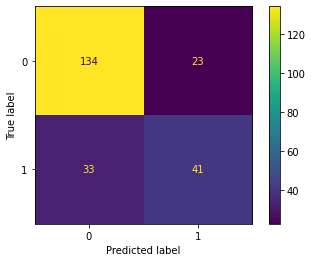

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
dis=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cls.classes_)
dis.plot()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(yt, yp)))
print('Precision score: {}'.format(precision_score(yt, yp,pos_label=0)))
print('Recall score: {}'.format(recall_score(yt, yp,pos_label=0)))
print('F1 score: {}'.format(f1_score(yt, yp,pos_label=0)))

Accuracy score: 0.7575757575757576
Precision score: 0.8023952095808383
Recall score: 0.8535031847133758
F1 score: 0.8271604938271604


In [37]:
cls.coefs_

[array([[-1.04279718e-01, -1.19397174e-22,  3.55524595e-01,
          5.73875512e-33, -4.71045830e-33, -7.85954804e-02,
          1.16073304e-01, -7.99225309e-06],
        [ 3.98154637e-01, -2.20648361e-11,  8.51285603e-01,
         -4.96667890e-13, -3.06232203e-03, -1.19184570e-01,
         -2.37622558e-01, -5.28111723e-12],
        [-2.70728539e-02,  2.46794564e-18, -6.15491086e-02,
         -5.76930971e-06, -6.43481220e-03, -5.08553102e-01,
          7.60633538e-01, -9.40606116e-04],
        [ 2.30907013e-01,  3.02872957e-07, -2.07862682e-01,
         -2.91155819e-06, -1.01473531e-04,  2.06104110e-01,
          3.13623830e-04, -5.60163315e-31],
        [-2.12670339e-01,  1.44069167e-04,  4.91812082e-02,
          4.88208774e-03,  7.34675263e-16, -1.03767596e-02,
          6.88994831e-02,  2.07167536e-06],
        [ 7.72811119e-01, -6.05493871e-03,  8.47655096e-02,
         -4.03329681e-15, -3.80271223e-04, -5.98641025e-01,
          3.20747374e-01,  1.16949680e-04],
        [ 5.2912

In [39]:
cls.intercepts_

[array([-0.46670345, -0.47943952, -0.30690342, -0.32778142, -0.39939342,
         0.25501977,  0.70148266, -0.56564312]),
 array([ 0.19913919,  0.41890466, -0.1468135 ,  0.31270516,  0.43871274,
         0.03019501, -0.24047081,  0.58337479]),
 array([ 0.30612147, -0.12579121, -0.06362709, -0.21876846,  0.01754296,
        -0.00503249, -0.24553473, -0.10857675]),
 array([0.06695766])]